<a href="https://colab.research.google.com/github/shubhamyaduvanshi/Caclulator/blob/master/alexnetmnistkeras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
from keras.layers.advanced_activations import LeakyReLU 
from keras.preprocessing.image import ImageDataGenerator

np.random.seed(25)

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)
print("X_test original shape", X_test.shape)
print("y_test original shape", y_test.shape)

X_train original shape (60000, 28, 28)
y_train original shape (60000,)
X_test original shape (10000, 28, 28)
y_test original shape (10000,)


Text(0.5, 1.0, 'Class 5')

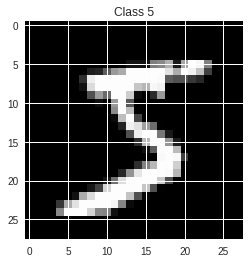

In [10]:
plt.imshow(X_train[0], cmap='gray')
plt.title('Class '+ str(y_train[0]))

In [11]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train/=255
X_test/=255

X_train.shape

(60000, 28, 28, 1)

In [12]:
number_of_classes = 10

Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)

y_train[0], Y_train[0]

(5, array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32))

In [0]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(28,28,1)))
model.add(Activation('relu'))
BatchNormalization(axis=-1)
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

BatchNormalization(axis=-1)
model.add(Conv2D(64,(3, 3)))
model.add(Activation('relu'))
BatchNormalization(axis=-1)
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
# Fully connected layer

BatchNormalization()
model.add(Dense(512))
model.add(Activation('relu'))
BatchNormalization()
model.add(Dropout(0.2))
model.add(Dense(10))

# model.add(Convolution2D(10,3,3, border_mode='same'))
# model.add(GlobalAveragePooling2D())
model.add(Activation('softmax'))

In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_7 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_8 (Activation)    (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
activation_9 (Activation)    (None, 10, 10, 64)        0         
__________

In [0]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [0]:
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                         height_shift_range=0.08, zoom_range=0.08)

test_gen = ImageDataGenerator()

In [0]:
train_generator = gen.flow(X_train, Y_train, batch_size=64)
test_generator = test_gen.flow(X_test, Y_test, batch_size=64)

In [19]:
model.fit_generator(train_generator, steps_per_epoch=60000//64, epochs=5, 
                    validation_data=test_generator, validation_steps=10000//64)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
937/937 [==============================] - 189s 201ms/step - loss: 0.2050 - acc: 0.9342 - val_loss: 0.0335 - val_acc: 0.9884
Epoch 2/5
937/937 [==============================] - 186s 198ms/step - loss: 0.0638 - acc: 0.9797 - val_loss: 0.0290 - val_acc: 0.9900
Epoch 3/5
937/937 [==============================] - 187s 199ms/step - loss: 0.0493 - acc: 0.9855 - val_loss: 0.0211 - val_acc: 0.9925
Epoch 4/5
937/937 [==============================] - 188s 200ms/step - loss: 0.0414 - acc: 0.9869 - val_loss: 0.0189 - val_acc: 0.9936
Epoch 5/5
937/937 [==============================] - 188s 200ms/step - loss: 0.0363 - acc: 0.9892 - val_loss: 0.0170 - val_acc: 0.9941


In [21]:
score = model.evaluate(X_test, Y_test)
print()
print('Test accuracy: ', score[1])


10000/10000 [==============================] - 8s 827us/step

Test accuracy:  0.994


In [0]:
predictions = model.predict_classes(X_test)

predictions = list(predictions)
actuals = list(y_test)

sub = pd.DataFrame({'Actual': actuals, 'Predictions': predictions})
sub.to_csv('./output_cnn.csv', index=False)

In [0]:
class MixIterator(object):
    def __init__(self, iters):
        self.iters = iters
        self.N = sum([it.n for it in self.iters])

    def reset(self):
        for it in self.iters: it.reset()

    def __iter__(self):
        return self

    def __next__(self, *args, **kwargs):
        nexts = [next(it) for it in self.iters]
        n0 = np.concatenate([n[0] for n in nexts])
        n1 = np.concatenate([n[1] for n in nexts])
        return (n0, n1)
      

In [25]:
predictions = model.predict(X_test, batch_size=64)

predictions[:5]

array([[9.0024246e-09, 9.5344845e-08, 2.4812547e-05, 1.3020679e-05,
        1.4470262e-08, 2.0694786e-08, 3.1123264e-11, 9.9992001e-01,
        1.8853765e-06, 4.0169827e-05],
       [2.2918067e-08, 5.8607061e-06, 9.9998736e-01, 1.0555404e-08,
        1.4375097e-07, 1.2694600e-10, 7.2353185e-07, 5.3017607e-06,
        3.1864197e-08, 5.1883700e-07],
       [2.6628827e-08, 9.9999738e-01, 1.8980522e-08, 2.8158359e-10,
        1.3202520e-06, 2.3523167e-07, 1.8265865e-07, 4.7975657e-08,
        8.6666148e-08, 7.8863968e-07],
       [9.9882764e-01, 3.0685527e-08, 9.1285556e-06, 3.4894651e-07,
        1.7663331e-06, 3.5012640e-06, 2.5521600e-04, 9.9616429e-08,
        4.8761813e-05, 8.5349433e-04],
       [1.7098389e-11, 4.5323613e-11, 2.6440269e-10, 1.6842446e-12,
        9.9999905e-01, 1.9997077e-09, 2.4596017e-10, 1.6016972e-09,
        2.6169767e-08, 9.5740052e-07]], dtype=float32)

In [0]:
batches = gen.flow(X_train, Y_train, batch_size=48)
test_batches = test_gen.flow(X_test, predictions, batch_size=16)

In [27]:
mi = MixIterator([batches, test_batches])

mi.N


70000

In [0]:
model.fit_generator(mi, steps_per_epoch=mi.N//64, epochs=5, validation_data=(X_test, Y_test))

Epoch 1/5
1093/1093 [==============================] - 208s 190ms/step - loss: 0.0325 - acc: 0.9915 - val_loss: 0.0188 - val_acc: 0.9947
Epoch 2/5
1093/1093 [==============================] - 209s 191ms/step - loss: 0.0298 - acc: 0.9921 - val_loss: 0.0223 - val_acc: 0.9942
Epoch 3/5
 513/1093 [=============>................] - ETA: 1:46 - loss: 0.0304 - acc: 0.9919

In [0]:
# choose any image to want by specifying the index
img_to_visualize = X_train[65]
# Keras requires the image to be in 4D
# So we add an extra dimension to it.
img_to_visualize = np.expand_dims(img_to_visualize, axis=0)


In [0]:
def layer_to_visualize(layer):
    inputs = [K.learning_phase()] + model.inputs

    _convout1_f = K.function(inputs, [layer.output])
    def convout1_f(X):
        # The [0] is to disable the training phase flag
        return _convout1_f([0] + [X])

    convolutions = convout1_f(img_to_visualize)
    convolutions = np.squeeze(convolutions)

    print ('Shape of conv:', convolutions.shape)
    
    n = convolutions.shape[0]
    n = int(np.ceil(np.sqrt(n)))
    
    # Visualization of each filter of the layer
    fig = plt.figure(figsize=(12,8))
    for i in range(len(convolutions)):
        ax = fig.add_subplot(n,n,i+1)
        ax.imshow(convolutions[i], cmap='gray')